# Superdense Coding

Superdense coding is a quantum communication protocol that enables the `transmission of two classical bits of information using only one qubit`. This protocol leverages the properties of quantum entanglement to achieve a more efficient use of quantum resources.

### How Superdense Coding Works

1. **Entanglement Creation**:
   - Alice and Bob share a pair of entangled qubits, typically prepared in a Bell state (one of the four maximally entangled states). This entanglement serves as the key resource for the protocol.

2. **State Encoding**:
   - Alice wishes to send two classical bits to Bob. To accomplish this, she encodes these bits into her qubit by applying one of four quantum gates (Pauli X, Pauli Z, Pauli XZ, or the identity operation) to her qubit. Each gate corresponds to one of the four possible classical messages: 00, 01, 10, or 11.

3. **Sending the Qubit**:
   - Alice then sends her qubit to Bob. The qubit that Alice transmits, combined with Bob's entangled qubit, forms a new joint quantum state.

4. **Decoding the Message**:
   - Upon receiving Alice's qubit, Bob performs a joint measurement on both qubits (the one he originally had and the one he received from Alice). This measurement decodes the classical information from the combined state, allowing Bob to retrieve the two classical bits that Alice encoded.

### Key Points

- **Efficiency**: Superdense coding allows for the transmission of two classical bits using only one qubit, effectively doubling the capacity of a quantum communication channel compared to classical methods.

- **Entanglement Resource**: The success of the protocol relies on the initial entanglement shared between Alice and Bob. Proper entanglement preparation is crucial for accurate information transfer.

- **Classical Information**: After performing the measurement, Bob can perfectly reconstruct the two classical bits that Alice intended to send.

- **Quantum Measurement**: Bob's measurement involves a Bell-state measurement, which distinguishes between the four possible quantum states created by Alice's encoding.

Superdense coding illustrates the power of quantum entanglement in enhancing communication efficiency. By using quantum resources to transmit classical information, it showcases the unique advantages offered by quantum technologies over classical systems.


In [1]:
import cirq
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range (2**num_qubits)]

plt.rcParams.update({'font.size': 8})

## Step 1: Define Quantum and Classical Registers

- **`rbg` (Randomizer Qubit)**: Used to generate random bits for Alice.
- **`ebit0` and `ebit1` (Entangled Qubits)**: Form the entangled pair between Alice and Bob. `ebit0` is with Alice, and `ebit1` is with Bob.

In [2]:
# Define qubits
rbg = cirq.NamedQubit('randomizer')  # Quantum register for the random bit generator
ebit0 = cirq.NamedQubit('A')         # Qubit 'A' as part of the entangled pair (ebit) shared with Bob
ebit1 = cirq.NamedQubit('B')         # Qubit 'B' as part of the entangled pair (ebit) shared with Alice

## Step 2: Prepare Entangled Qubits

- **Hadamard Gate on `ebit0`**: Creates a superposition state on qubit `ebit0`. The Hadamard gate transforms the state $0\rangle$ to $ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $.

- **CNOT Gate**: Entangles `ebit0` with `ebit1`.


In [3]:
# Create a circuit
test = cirq.Circuit()

# Initialize the entangled bit (ebit)
test.append(cirq.H(ebit0))            # Apply Hadamard gate to qubit 'A' to create superposition
test.append(cirq.CNOT(ebit0, ebit1))  # Apply CNOT gate to entangle qubit 'A' (control) with qubit 'B' (target)

test

A: ───H───@───
          │
B: ───────X───

## Step 3: Generate Alice's Bits c and d

- **Hadamard Gates and Measurements on `rbg`**: These operations generate two random classical bits, `c` and `d`, which will dictate Alice's subsequent actions. Applying Hadamard gates to the `rbg` qubit creates a superposition, and measuring the `rbg` qubit after these gates yields random bit values. These measurements are stored in the classical registers `Alice_c` and `Alice_d`.


In [4]:
# Use the 'randomizer' qubit to generate Alice's bits c and d
test.append(cirq.H(rbg))              # Apply Hadamard gate to the 'randomizer' qubit to create superposition (generate random bit for 'c')
test.append(cirq.measure(rbg, key='Alice_c'))  # Measure the 'randomizer' qubit and store the result in 'Alice_c'
test.append(cirq.H(rbg))              # Apply Hadamard gate again to the 'randomizer' qubit (generate random bit for 'd')
test.append(cirq.measure(rbg, key='Alice_d'))  # Measure the 'randomizer' qubit and store the result in 'Alice_d'

test


A: ────────────H───@─────────────────────────────────
                   │
B: ────────────────X─────────────────────────────────

randomizer: ───H───M('Alice_c')───H───M('Alice_d')───

## Step 4: Alice's Actions Based on Her Bits

- **Conditional X Gate**: Applied to `ebit0` if Alice's bit `c` is 1. This operation flips the state of `ebit0` from $|0\rangle$ to $|1\rangle$ or vice versa.

- **Conditional Z Gate**: Applied to `ebit0` if Alice's bit `d` is 1. This introduces a phase flip (Z gate) on `ebit0`, changing the phase of the state.


In [5]:
# Apply the gates based on Alice's bits
test.append(cirq.X(ebit0).with_classical_controls('Alice_c'))  # Apply X gate if 'Alice_c' is 1
test.append(cirq.Z(ebit0).with_classical_controls('Alice_d'))  # Apply Z gate if 'Alice_d' is 1

test

┌──┐
A: ────────────H───@─────X────────Z───
                   │     ║        ║
B: ────────────────X─────╫────────╫───
                         ║        ║
randomizer: ───H───M────H╫────M───╫───
                   ║     ║    ║   ║
Alice_c: ══════════@═════^════╬═══╬═══
                              ║   ║
Alice_d: ═════════════════════@═══^═══
                       └──┘

## Step 5: Bob's Actions

- **CNOT Gate**: Applied to `ebit0` (Alice's qubit) and `ebit1` (Bob's qubit) to disentangle the qubits, transferring the encoded information from `ebit0` to `ebit1`.

- **Hadamard Gate on `ebit0`**: Transforms the state of `ebit0` to reveal the encoded information. This is necessary to complete the decoding process, allowing Bob to measure the final state correctly.


In [6]:
# Bob's actions
test.append(cirq.CNOT(ebit0, ebit1))  # Apply CNOT gate with qubit 'A' as control and qubit 'B' as target to disentangle
test.append(cirq.H(ebit0))            # Apply Hadamard gate to qubit 'A' to complete the decoding process

test

┌──┐
A: ────────────H───@─────X────────Z───@───H───
                   │     ║        ║   │
B: ────────────────X─────╫────────╫───X───────
                         ║        ║
randomizer: ───H───M────H╫────M───╫───────────
                   ║     ║    ║   ║
Alice_c: ══════════@═════^════╬═══╬═══════════
                              ║   ║
Alice_d: ═════════════════════@═══^═══════════
                       └──┘

## Step 6: Store Bob's Measurements

- **Measurements**: Bob measures the entangled qubits `ebit0` and `ebit1`. The results of these measurements are stored in Bob's classical registers `Bob_d` and `Bob_c`, which should match Alice's original bits `c` and `d`.

In [7]:
# Bob's measurement
test.append(cirq.measure(ebit0, key='Bob_d'))  # Measure qubit 'A' and store the result in Bob's 'd' classical register
test.append(cirq.measure(ebit1, key='Bob_c'))  # Measure qubit 'B' and store the result in Bob's 'c' classical register

test

┌──┐
A: ────────────H───@─────X────────Z───@───H────────────M('Bob_d')───
                   │     ║        ║   │
B: ────────────────X─────╫────────╫───X───M('Bob_c')────────────────
                         ║        ║
randomizer: ───H───M────H╫────M───╫─────────────────────────────────
                   ║     ║    ║   ║
Alice_c: ══════════@═════^════╬═══╬═════════════════════════════════
                              ║   ║
Alice_d: ═════════════════════@═══^═════════════════════════════════
                       └──┘

## Step 7: Display and Run the Circuit

- **Circuit Diagram**: Displays the visual representation of the quantum circuit.
- **Simulation**: Runs the circuit multiple times (1000 repetitions) to collect statistics on the measurement outcomes.
- **Histogram**: Shows the distribution of measurement results, demonstrating whether Bob's results agree with Alice's original bits.


Quantum Circuit Diagram:
                       ┌──┐
A: ────────────H───@─────X────────Z───@───H────────────M('Bob_d')───
                   │     ║        ║   │
B: ────────────────X─────╫────────╫───X───M('Bob_c')────────────────
                         ║        ║
randomizer: ───H───M────H╫────M───╫─────────────────────────────────
                   ║     ║    ║   ║
Alice_c: ══════════@═════^════╬═══╬═════════════════════════════════
                              ║   ║
Alice_d: ═════════════════════@═══^═════════════════════════════════
                       └──┘


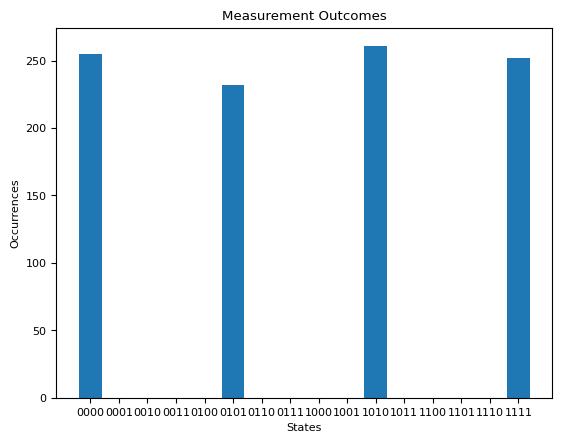

In [8]:
# Display the quantum circuit diagram
print("Quantum Circuit Diagram:")
print(test)

# Create a simulator instance
simulator = cirq.Simulator()

# Run the quantum circuit on the simulator and get the result
result = simulator.run(test, repetitions=1000)  # Run the circuit with 1000 repetitions

# Plot the histogram of the measurement outcomes
hist = cirq.plot_state_histogram(result, plt.subplot(), title='Measurement Outcomes', xlabel='States', ylabel='Occurrences', tick_label=binary_labels(4))

plt.show()

## Discussion on the Superdense Coding Protocol Results

The successful implementation of the superdense coding protocol is demonstrated by the measurement results, where the states with non-zero values are `0000`, `0101`, `1010`, and `1111`. This result confirms that Alice and Bob's classical bits always agree, as intended by the protocol. Here’s a detailed discussion on the outcome:

### Protocol Recap

1. **Entanglement Preparation**: Alice and Bob start with an entangled pair of qubits. This entanglement is achieved by applying a Hadamard gate to `ebit0` followed by a CNOT gate, creating a Bell state between `ebit0` (Alice's qubit) and `ebit1` (Bob's qubit).

2. **Random Bit Generation**: Alice generates two classical bits `c` and `d` by measuring a third qubit (`rbg`) after applying Hadamard gates. These bits determine the operations Alice will perform on her qubit.

3. **Alice's Actions**: Based on the values of `c` and `d`, Alice applies conditional gates (`X` and `Z`) to `ebit0`. These gates encode Alice’s bits into the entangled state.

4. **Transmission and Bob's Decoding**: Alice sends her qubit to Bob, who then performs operations to decode the information. `Bob applies a CNOT gate followed by a Hadamard gate to extract the encoded bits from the entangled state`.

5. **Measurement**: Bob measures the qubits and records the results in his classical registers. 

### Results Analysis

The non-zero states observed in the histogram are `0000`, `0101`, `1010`, and `1111`. Here's the detailed analysis of these results:

- **State `0000`**: This indicates that Alice’s bits were `00` and Bob’s bits were `00`. This state occurs when neither `X` nor `Z` gates are applied by Alice.

- **State `0101`**: This indicates that Alice’s bits were `01` and Bob’s bits were `01`. Alice applied only the `Z` gate, introducing a phase flip.

- **State `1010`**: This state corresponds to Alice’s bits `10` and Bob’s bits `10`. Alice applied only the `X` gate, flipping the state of her qubit.

- **State `1111`**: This indicates that Alice’s bits were `11` and Bob’s bits were `11`. Alice applied both the `X` and `Z` gates, resulting in both state and phase flips.

### Conclusion

The successful transmission and agreement of classical bits between Alice and Bob validate the superdense coding protocol. The fact that the states are consistent and aligned as `0000`, `0101`, `1010`, and `1111` confirms that Alice’s encoded bits are correctly received by Bob. This result demonstrates that superdense coding allows for the efficient transmission of two classical bits of information using only one qubit, leveraging the power of quantum entanglement and operations.

The histogram shows that the protocol works as expected, and the classical bits Alice sends are accurately decoded by Bob, confirming the successful implementation of the superdense coding protocol.
